In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('Position_salaries.csv')
ds.head()

,Position,Level,Salary (RM)
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
ds.tail()

,Position,Level,Salary (RM)
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Position     10 non-null     object
 1   Level        10 non-null     int64 
 2   Salary (RM)  10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
corr = ds.corr()
print(corr)

                Level  Salary (RM)
Level        1.000000     0.817949
Salary (RM)  0.817949     1.000000


In [7]:
x = ds.iloc[:, [1]].values
y = ds.iloc[:, 2].values
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


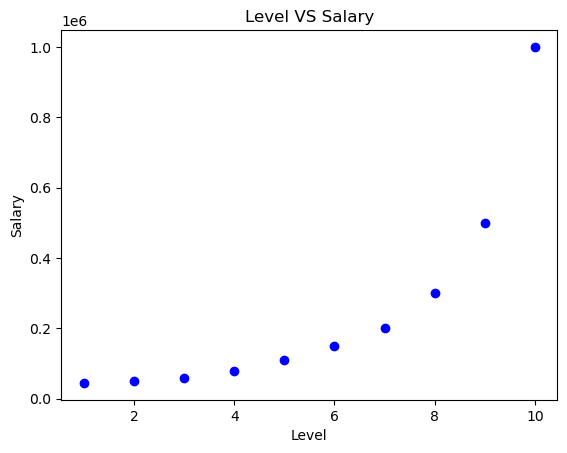

In [8]:
plt.scatter(x, y, color = 'blue')
plt.title('Level VS Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print('x_train:', x_train)
print('x_test:', x_test)
print('y_train:', y_train)
print('y_test:', y_test)

x_train: [[ 5]
 [10]
 [ 2]
 [ 7]
 [ 8]
 [ 4]
 [ 1]
 [ 6]]
x_test: [[3]
 [9]]
y_train: [ 110000 1000000   50000  200000  300000   80000   45000  150000]
y_test: [ 60000 500000]


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pf = PolynomialFeatures(degree = 3)
x_train_old = x_train
x_train = pf.fit_transform(x_train_old)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Coefficients, beta:', regressor.coef_)

Coefficients, beta: [     0.         175949.46161637 -47713.86152347   4108.01381927]


In [11]:
# equal to 1 is good
# equal to 0 is not good

x = regressor.score(x_train, y_train)
print(x)

0.991662594531016


In [13]:
x_test = pf.transform(x_test)

In [14]:
y_pred = regressor.predict(x_test)
print(y_pred)
print(y_test)

[ 99799.87225889 603924.31339153]
[ 60000 500000]


In [15]:
from sklearn.metrics import r2_score

y = r2_score(y_pred, y_test)
print(y)

0.9025401591036256


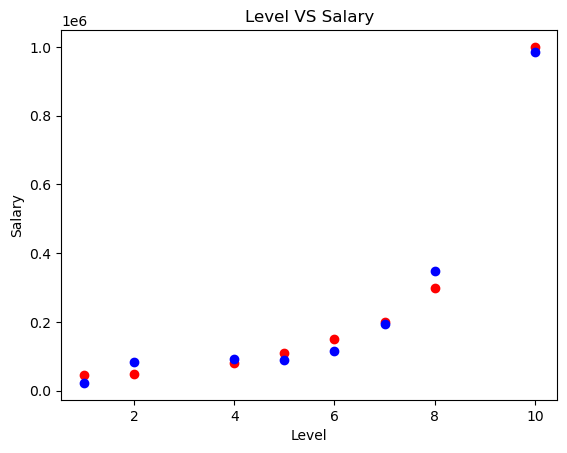

In [16]:
plt.scatter(x_train_old, y_train, color = 'red')
plt.scatter(x_train_old, regressor.predict(x_train), color = 'blue')
plt.title('Level VS Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [17]:
# Question:
# Predict a person salaries at job position 2.5.

y_pred = regressor.predict(pf.transform([[2.5]]))
print(y_pred)

[96309.60344611]
